# 📌 Problem Statement

- Generate **1000 samples** from a **uniform distribution** over the interval [-1, 1]:

  $$
  x \sim U(-1, 1)
  $$

- Use the **histogram method** to estimate the **probability density function (PDF)** of the distribution based on these samples.

- Choose an appropriate **bin width** $\Delta x$ (or equivalently, determine the number of bins).

- Finally, **plot the histogram estimate** of the PDF to visualize your approximation.



# ✅ Goal

- Understand how to **estimate an unknown distribution** using the **histogram technique** based on sample data.

- Observe how choices like **bin width $\Delta x$** impact the quality and smoothness of the estimated PDF.

---

# ✍️ Notes on Histogram Estimation

- The histogram provides a **non-parametric estimate** of the PDF:

  $$
  \hat{f}(x) = \frac{\text{Number of samples in bin}}{N \times \Delta x}
  $$

  where:
  - $N$ = total number of samples
  - $\Delta x$ = bin width (size of each interval)

- The histogram plot should approximate the **true PDF**, which for a uniform distribution over [-1, 1] is:

  $$
  f(x) = 
  \begin{cases}
  0.5, & -1 < x < 1 \\
  0, & \text{otherwise}
  \end{cases}
  $$

---

# 🚀 Visualization

- The histogram allows you to visually compare the **empirical distribution** (from your samples) to the **theoretical uniform distribution**.

- By adjusting $\Delta x$, you control the balance between:
  - **Variance** (too small $\Delta x$ → noisy estimate),
  - **Bias** (too large $\Delta x$ → oversmooth estimate).

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.parzen_pdf_estimation import gaussian_parzen_estimation

In [3]:
n_samples = 1000
x = np.random.uniform(-1, 1, n_samples)

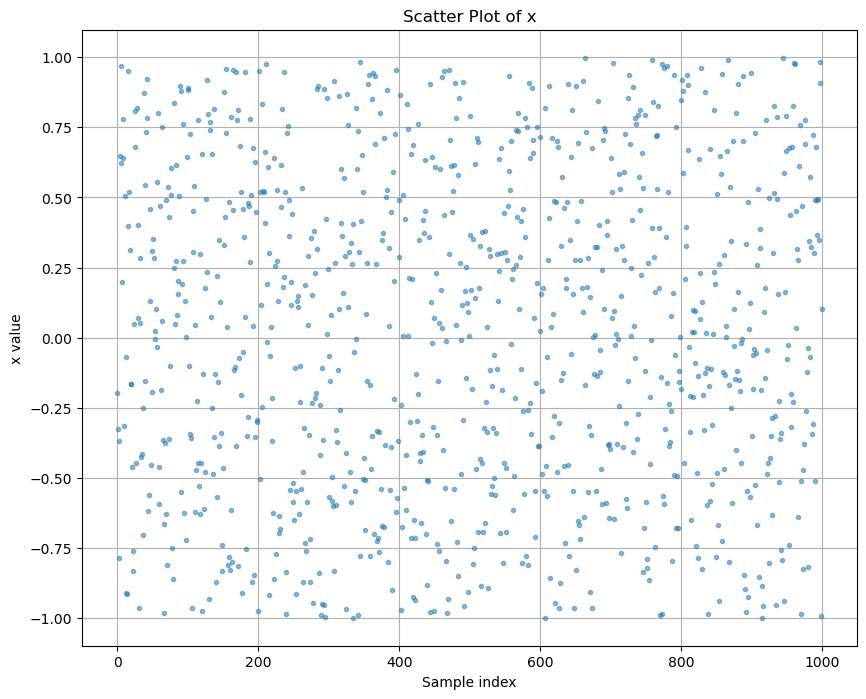

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(x, '.', alpha=0.5)
plt.title('Scatter Plot of x')
plt.xlabel('Sample index')
plt.ylabel('x value')
plt.grid(True)
plt.show()

In [5]:
num_bins = int(np.sqrt(n_samples))
delta_x = 2 / num_bins

# counts, bin_edges = np.histogram(x, bins=num_bins, range=(-1, 1))

bin_edges = np.linspace(-1, 1, num=(num_bins + 1))

In [6]:
counts = np.zeros(num_bins)

for value in x:
    for i in range(num_bins):
        if bin_edges[i] <= value < bin_edges[i+1]:
            counts[i] +=1
            break

    if value == bin_edges[-1]:
        counts[-1] += 1

In [7]:
pdf_estimates = counts / (n_samples * delta_x)

In [8]:
bin_center = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(num_bins)]
print(f"Lenght of bin_center: {len(bin_center)}")

Lenght of bin_center: 31


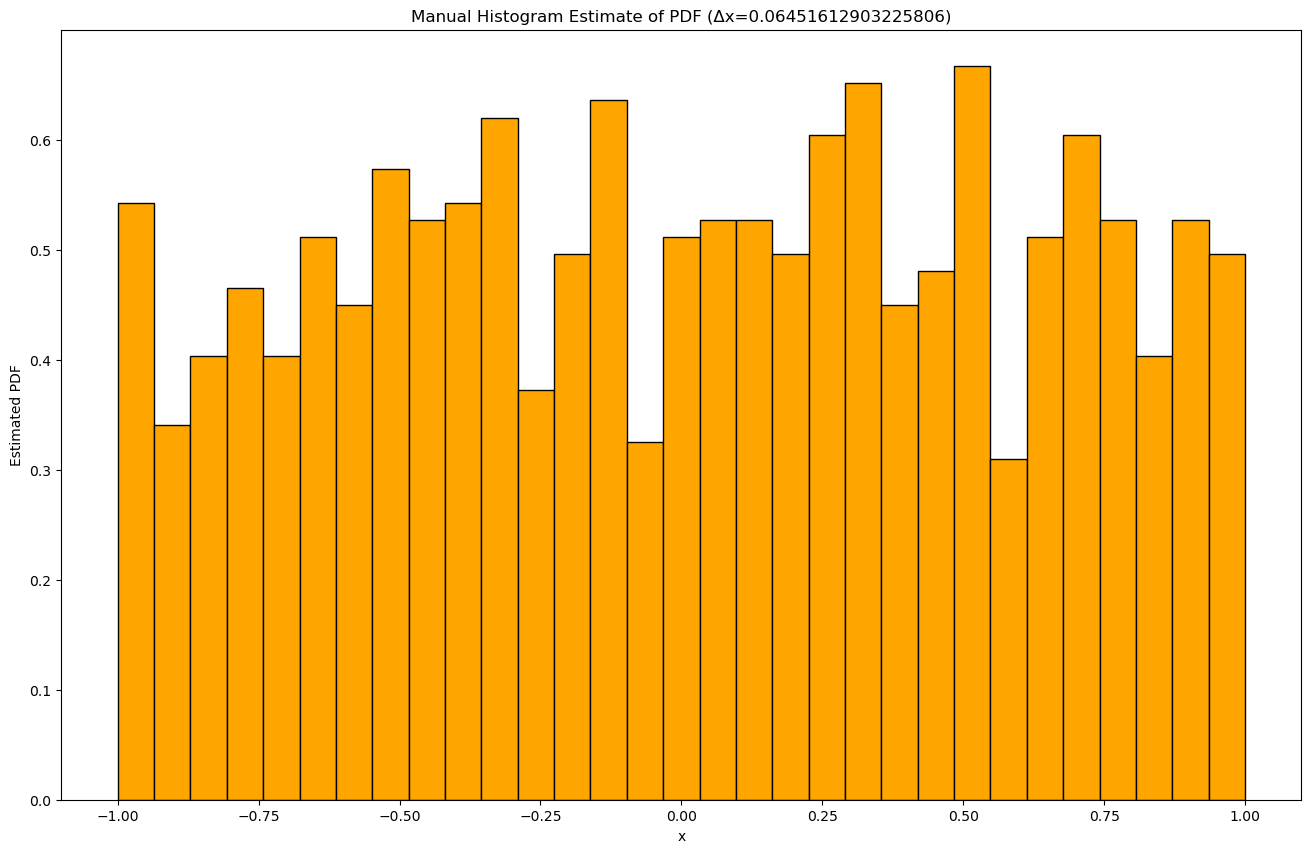

In [9]:
plt.figure(figsize=(16, 10))
plt.bar(bin_center, pdf_estimates, width=delta_x, color='orange', edgecolor='black')
plt.title(f"Manual Histogram Estimate of PDF (Δx={delta_x})")
plt.xlabel("x")
plt.ylabel("Estimated PDF")
plt.grid(False)
plt.show()

# Estimating Probability Density using Parzen Window with Gaussian Kernel

## 🎯 Objective
To estimate the probability density function (PDF) of a dataset **without knowing the original distribution**, using a non-parametric method.

## 📌 Core Idea
Place a **kernel function** (e.g., a Gaussian bump) on top of each data point, and average all the kernels to build an estimate of the overall density.

## 📘 PDF Estimation Formula

Given a point $x$, the estimated density is:

$$
\hat{f}_h(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

Where:

- $n$: Number of data samples  
- $h$: Bandwidth (window width)  
- $x_i$: Data points  
- $K(u)$: Kernel function (e.g., Gaussian)

## 🔹 Gaussian Kernel

The Gaussian kernel is defined as:

$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
$$

This kernel is symmetric, smooth, and widely used due to its good mathematical properties.

## ⚠️ Role of Bandwidth $h$

- **Small $h$** → Very noisy estimate (overfitting)  
- **Large $h$** → Too smooth and blurry (underfitting)  
- **Proper $h$** → A good balance that captures the overall shape



Text(0.5, 1.0, 'Parzen PDF Estimation')

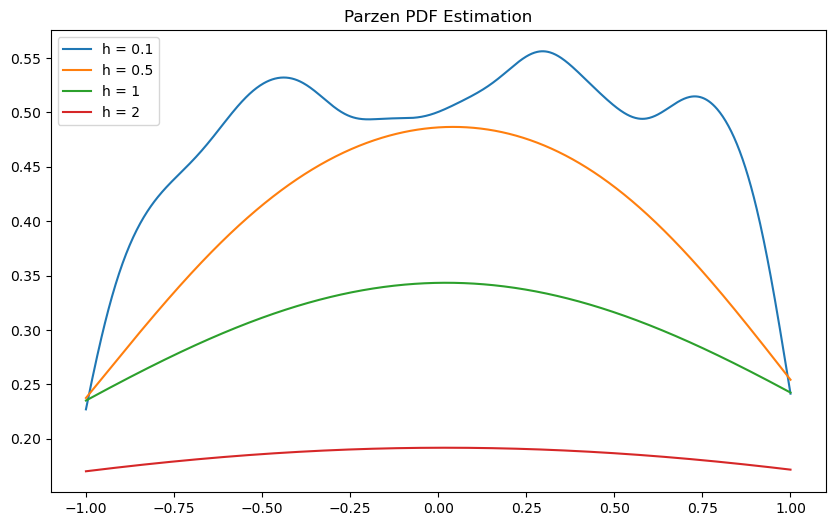

In [13]:
hs = [0.1, 0.5, 1, 2]
points = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 6))

for h in hs:
    estimated = [gaussian_parzen_estimation(point, samples=x, h=h) for point in points]
    plt.plot(points, estimated, label=f'h = {h}')
plt.legend()
plt.title('Parzen PDF Estimation')


- **Parzen Window Estimation** with Gaussian kernels produces a **smooth and continuous** estimate of the probability density function (PDF).  
- The **bandwidth parameter ($h$)** controls the smoothness:
  - Small $h$ → overfitting (too many fluctuations).
  - Large $h$ → underfitting (loss of detail).
- Among the tested values, **$h = 0.5$ or $h = 1.0$** provided the best balance between detail and smoothness for the uniform distribution.

- In contrast, the **Histogram Method** provides a **discrete and blocky** estimate.  
  - It is **sensitive to bin size and bin alignment**, and shows significant fluctuations due to random sampling noise—even though the true distribution is uniform.

### ✅ Conclusion:
Parzen estimation offers a more reliable and visually interpretable approximation of the true PDF compared to histograms. Proper tuning of the bandwidth $h$ is essential to avoid overfitting or underfitting.
